In [1]:
import pandas as pd

In [2]:
def loadMeasurement (fname):
    df = pd.read_csv(fname,header=None,names=["program","limit","n_primes","duration"])
    df.drop(columns=["program","n_primes"],inplace=True)
    df["limit"] = df["limit"].str.replace("limit=","",regex=False)
    df = df.set_index("limit")
    df["duration"] = df["duration"].str.replace("time(s)=<","",regex=False)
    df["duration"] = df["duration"].str.replace(">","",regex=False)
    df["duration"] = df["duration"].astype(float)
    return df

In [3]:
marvin_cuda = loadMeasurement("20220523-172525_copri_cuda.csv")
alldata = marvin_cuda.rename(columns={'duration':'cuda_marvin'})

marvin_seq = loadMeasurement("20220523-173149_copri_seq_marvin.csv")
alldata['seq_marvin']=marvin_seq['duration']

marvin_atomic = loadMeasurement("20220523-191957_copri_pthreads_atomic.csv")
alldata['atomic_marvin']=marvin_atomic['duration']

<AxesSubplot:xlabel='limit'>

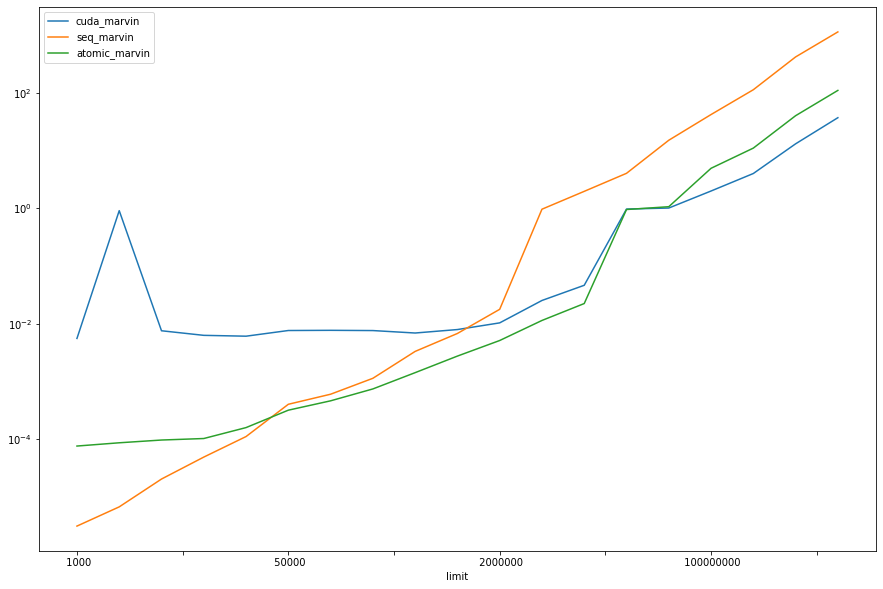

In [4]:
alldata.plot(kind='line',y=['cuda_marvin','seq_marvin','atomic_marvin'],logy=True,figsize=(15,10))

In [5]:
alldata['speedup_cuda'] = alldata['seq_marvin'] / alldata['cuda_marvin']
alldata['speedup_atomic'] = alldata['seq_marvin'] / alldata['atomic_marvin']

<AxesSubplot:xlabel='limit'>

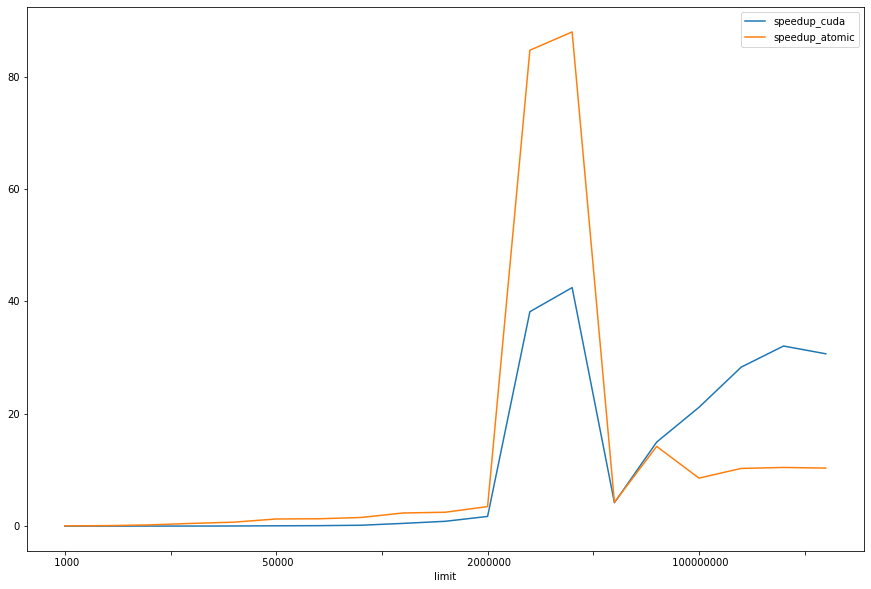

In [6]:
alldata.plot(kind='line',y=['speedup_cuda','speedup_atomic'],figsize=(15,10))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=854e6227-4aec-49bc-9052-e9911c1cefc6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>